In [1]:
!unzip "/content/archive (3).zip" -d "/content"

Archive:  /content/archive (3).zip
  inflating: /content/CK+48/anger/S010_004_00000017.png  
  inflating: /content/CK+48/anger/S010_004_00000018.png  
  inflating: /content/CK+48/anger/S010_004_00000019.png  
  inflating: /content/CK+48/anger/S011_004_00000019.png  
  inflating: /content/CK+48/anger/S011_004_00000020.png  
  inflating: /content/CK+48/anger/S011_004_00000021.png  
  inflating: /content/CK+48/anger/S014_003_00000028.png  
  inflating: /content/CK+48/anger/S014_003_00000029.png  
  inflating: /content/CK+48/anger/S014_003_00000030.png  
  inflating: /content/CK+48/anger/S022_005_00000030.png  
  inflating: /content/CK+48/anger/S022_005_00000031.png  
  inflating: /content/CK+48/anger/S022_005_00000032.png  
  inflating: /content/CK+48/anger/S026_003_00000013.png  
  inflating: /content/CK+48/anger/S026_003_00000014.png  
  inflating: /content/CK+48/anger/S026_003_00000015.png  
  inflating: /content/CK+48/anger/S028_001_00000022.png  
  inflating: /content/CK+48/anger/S02

In [2]:

import numpy as np
import pandas as pd
import os, cv2



In [3]:

for dirname, _, filenames in os.walk('/content/facial-emotion-detection/data'):
  for filename in filenames:
    os.path.join(dirname, filename)

In [5]:
directory='/content/CK+48'
dir_list=os.listdir(directory)
image_data_list=[]
labels=[]
emotions=[]
l=0
for data_dir in dir_list:
    data_list=os.listdir(directory+'/'+data_dir)
    for img in data_list:
        input_img=cv2.imread(directory+'/'+data_dir+'/'+img)
        input_img=cv2.resize(input_img,(48,48))
        image_data_list.append(input_img)
        labels.append(l)
    emotions.append(data_dir)
    l=l+1
img_data=np.array(image_data_list)
img_data=img_data/255
img_data.shape

(981, 48, 48, 3)

In [6]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
num_classes=7
Y = keras.utils.to_categorical(labels, num_classes)
X_train, X_test, y_train, y_test = train_test_split(img_data, Y, test_size=0.2)

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_generator_with_aug = ImageDataGenerator(horizontal_flip = True,
                                              width_shift_range = 0.1,
                                              height_shift_range = 0.1)
data_generator_no_aug = ImageDataGenerator()

train_generator=data_generator_with_aug.flow(X_train,y_train)
validation_generator=data_generator_with_aug.flow(X_test,y_test)

In [8]:
from keras.models import Sequential
from keras.layers import Dense , Activation , Dropout ,Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.metrics import categorical_accuracy

model=Sequential()
model.add(Conv2D(64,(3,3),padding="same",input_shape=(48,48,3),activation='relu'))
model.add(Conv2D(64,(3,3),padding="same",activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(256,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(num_classes,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [9]:
history=model.fit_generator(train_generator,epochs=100,validation_data=validation_generator)

<ipython-input-9-47cc38e7f8f4>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(train_generator,epochs=100,validation_data=validation_generator)


Epoch 1/100
25/25 [==============================] - 46s 2s/step - loss: 1.9401 - accuracy: 0.1837 - val_loss: 1.9199 - val_accuracy: 0.2437
Epoch 2/100
25/25 [==============================] - 37s 1s/step - loss: 1.9010 - accuracy: 0.2334 - val_loss: 1.8685 - val_accuracy: 0.2437
Epoch 3/100
25/25 [==============================] - 35s 1s/step - loss: 1.8665 - accuracy: 0.2130 - val_loss: 1.8394 - val_accuracy: 0.2437
Epoch 4/100
25/25 [==============================] - 35s 1s/step - loss: 1.8640 - accuracy: 0.2411 - val_loss: 1.8337 - val_accuracy: 0.2437
Epoch 5/100
25/25 [==============================] - 37s 1s/step - loss: 1.8771 - accuracy: 0.1926 - val_loss: 1.8426 - val_accuracy: 0.2437
Epoch 6/100
25/25 [==============================] - 34s 1s/step - loss: 1.8546 - accuracy: 0.2819 - val_loss: 1.8363 - val_accuracy: 0.2437
Epoch 7/100
25/25 [==============================] - 35s 1s/step - loss: 1.8748 - accuracy: 0.2079 - val_loss: 1.8505 - val_accuracy: 0.2437
Epoch 8/100
2

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

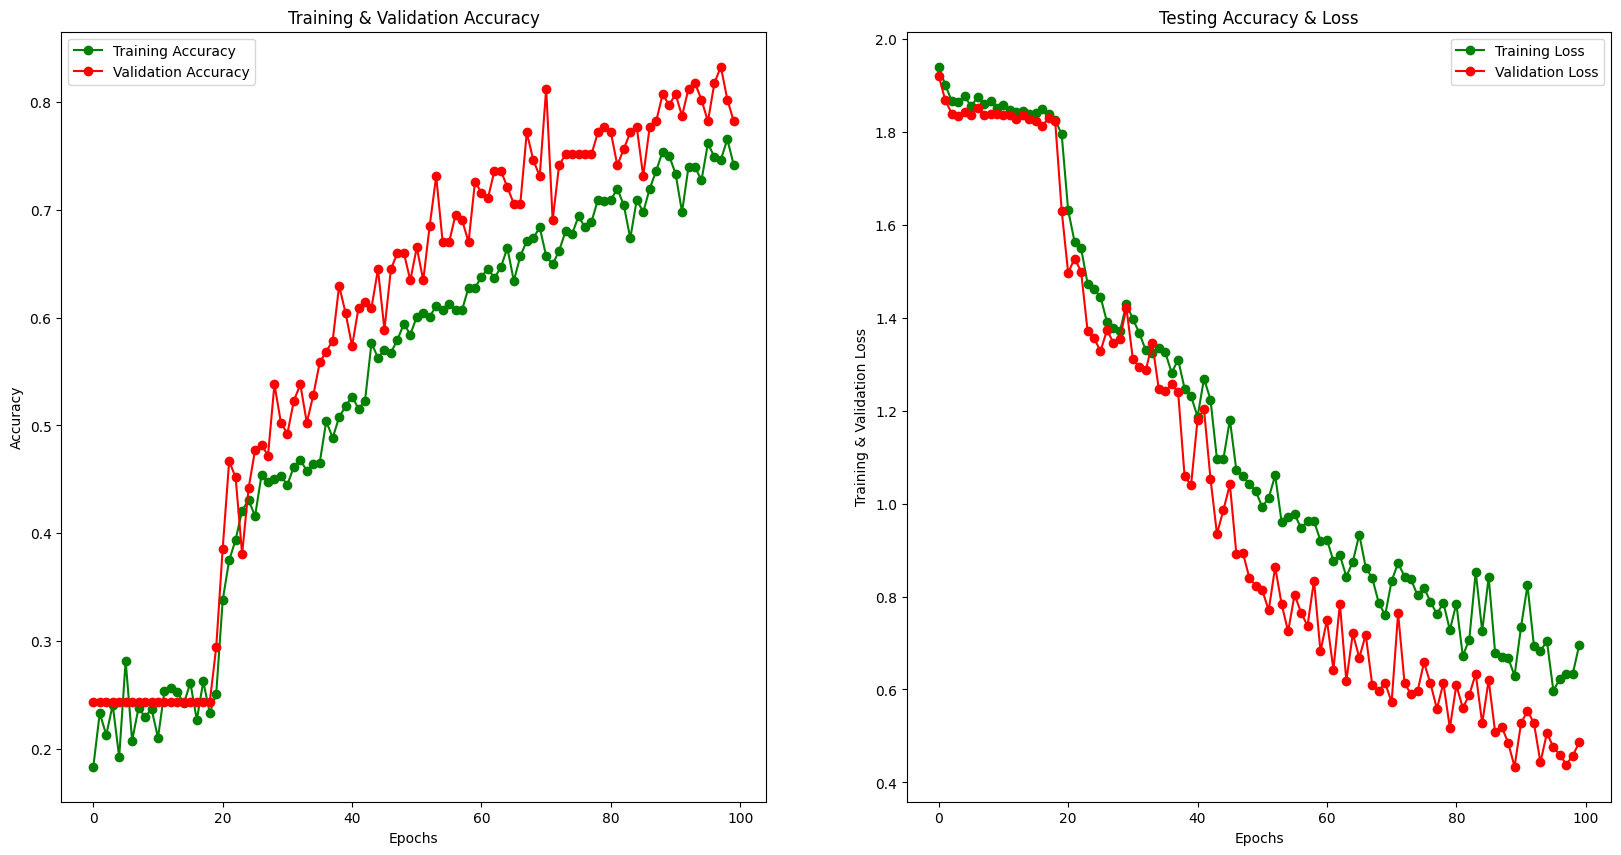

In [23]:
import matplotlib.pyplot as plt
epochs = [i for i in range(100)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")

from google.colab import files
plt.savefig("filename.pdf")
files.download("filename.pdf")
plt.show()

<Figure size 640x480 with 0 Axes>

In [17]:
import numpy as np
from sklearn.metrics import confusion_matrix

results = model.predict(X_test)
predicted_classes = np.argmax(results, axis=1)
y_test_classes = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test_classes, predicted_classes)



7/7 [==============================] - 2s 243ms/step


In [25]:

label = ['anger','contempt','disgust','fear','happy','sadness','surprise']
labels = {0 : 'anger', 1 :'contemp', 2:'disgust',3:'fear',4:'happy',5:'sadness',6:'surprise'}

In [26]:
cm_df = pd.DataFrame(cm, index = label,
                     columns = label)

In [28]:
final_cm = cm_df

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

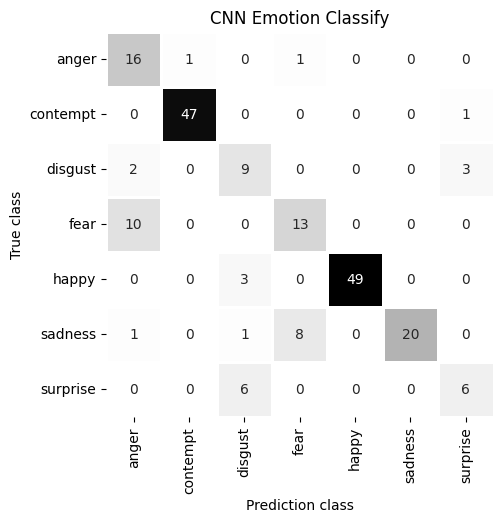

In [42]:

import seaborn as sns

plt.figure(figsize = (5,5))
sns.heatmap(final_cm, annot = True,cmap='Greys',cbar=False,linewidth=2,fmt='d')
plt.title('CNN Emotion Classify')
plt.ylabel('True class')
plt.xlabel('Prediction class')
plt.savefig("filename.pdf")
files.download("filename.pdf")
plt.show()

1/1 [==============================] - 0s 32ms/step
Actual class: happy
Predicted Class: happy


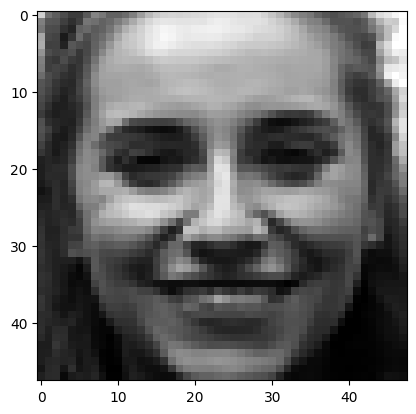

In [41]:
import random
from glob import glob
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
def choose_image_and_predict():
    folder_choice = (random.choice(dir_list))
    images = glob(directory + '/'+ folder_choice+'/*')
    img_choice = (random.choice(images))

    img = image.load_img(img_choice, target_size=(48, 48))
    img = image.img_to_array(img)
    plt.imshow(img / 255.)
    x = preprocess_input(np.expand_dims(img.copy(), axis=0))
    pred_class = model.predict(x)
    pred = model.predict(x)
    label=np.argmax(pred,axis=1)[0]
    print("Actual class:", folder_choice)
    print("Predicted Class:" , labels[label])

choose_image_and_predict()

In [45]:
model.save("Emotion-Recognition.h5")